In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#acquire
import acquire
import wrangle_mall
from env import host, username, password
from pydataset import data

## Q1 
Acquire data from the cloud database.

In [2]:
df = acquire.zillow_data()


In [3]:
# Cache Zillow Data
acquire.cache_zillow_data(cached=False)


In [4]:
# control check to see if any null in longitiude and latitude
df.latitude.isnull().sum(), df.longitude.isnull().sum()


(0, 0)

In [5]:
# control: shape
df.shape

(77580, 69)

In [6]:
# filter out by latest transactiondate
df = df.sort_values('transactiondate').drop_duplicates('parcelid',keep='last')


In [7]:
# control: check to see if shape changed (dropped 199 duplicated transactions)
df.shape


(77381, 69)

## Q2) 
Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)



In [8]:
# describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
typeconstructiontypeid,222.0,6.040541e+00,5.572847e-01,4.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,1.300000e+01
storytypeid,50.0,7.000000e+00,0.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
propertylandusetypeid,77381.0,2.618263e+02,5.141199e+00,3.100000e+01,2.610000e+02,2.610000e+02,2.660000e+02,2.750000e+02
heatingorsystemtypeid,49440.0,3.920510e+00,3.592779e+00,1.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.400000e+01
buildingclasstypeid,15.0,3.933333e+00,2.581989e-01,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
architecturalstyletypeid,206.0,7.388350e+00,2.734542e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
airconditioningtypeid,24953.0,1.813289e+00,2.967894e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
parcelid,77381.0,1.300715e+07,3.481346e+06,1.071186e+07,1.153830e+07,1.253157e+07,1.421183e+07,1.676893e+08
id,77381.0,3.884869e+04,2.240243e+04,0.000000e+00,1.946100e+04,3.887000e+04,5.825300e+04,7.761300e+04
logerror,77381.0,1.662499e-02,1.701908e-01,-4.655420e+00,-2.437679e-02,6.626972e-03,3.920313e-02,5.262999e+00


In [9]:
#dtypes
df.dtypes

typeconstructiontypeid          float64
storytypeid                     float64
propertylandusetypeid           float64
heatingorsystemtypeid           float64
buildingclasstypeid             float64
architecturalstyletypeid        float64
airconditioningtypeid           float64
parcelid                          int64
id                                int64
logerror                        float64
transactiondate                  object
id                                int64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64


In [10]:
df = df.loc[:, ~df.columns.duplicated()]
df.shape

(77381, 68)

In [11]:
# get value counts for discrete variables

desc_cols = [col for col in df.columns if (df[col].dtype == "object")]

for col in desc_cols:
    
    print(col)
    print(df[col].value_counts())
    print()

transactiondate
2017-06-30    1189
2017-04-28     911
2017-05-31     867
2017-07-28     814
2017-08-31     781
              ... 
2017-07-22       1
2017-08-05       1
2017-08-06       1
2017-08-12       1
2018-05-25       1
Name: transactiondate, Length: 265, dtype: int64

propertycountylandusecode
0100    26714
122     13045
010C     8813
0101     6399
34       4922
1111     3353
1        2393
010E     2047
010D     1943
0200     1835
1129     1378
1110     1024
0400      620
0300      481
012C      384
0104      367
1128      333
01DC      211
01HC      137
38         94
010G       93
96         91
0103       91
010H       64
0108       57
1117       55
010M       52
0700       50
1210       42
010V       39
135        38
010F       29
0201       23
0109       18
1222       16
01HE       11
1116       10
73          9
1310        8
1112        8
1720        7
0110        6
0113        6
1410        5
070D        5
012E        5
0401        4
0141        4
0105        3
1120        3

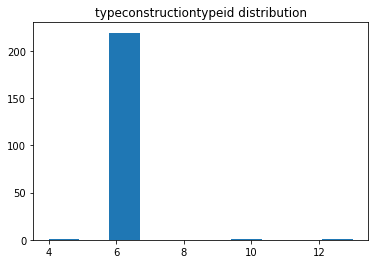

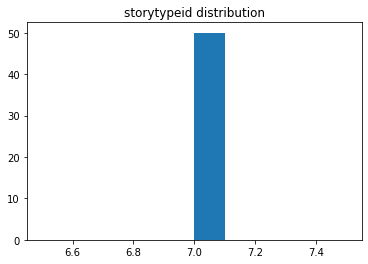

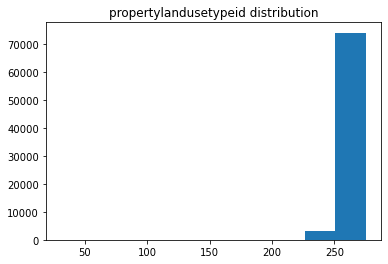

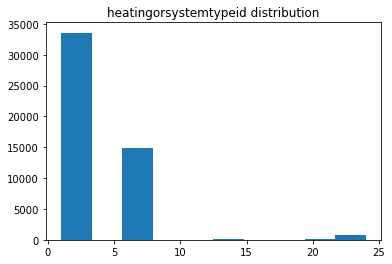

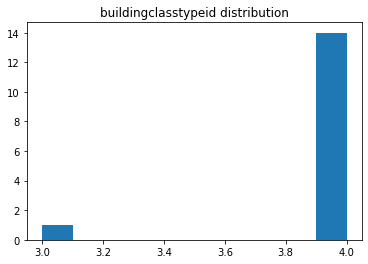

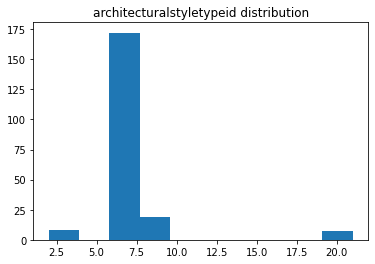

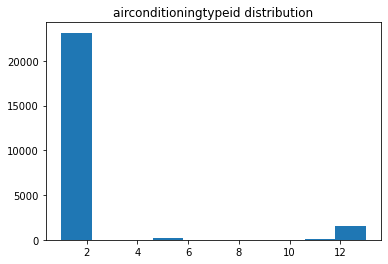

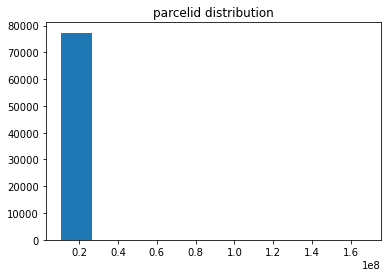

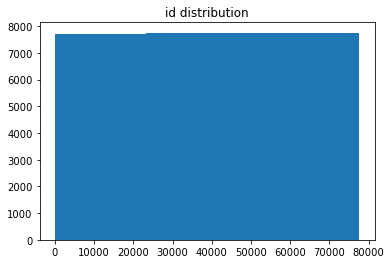

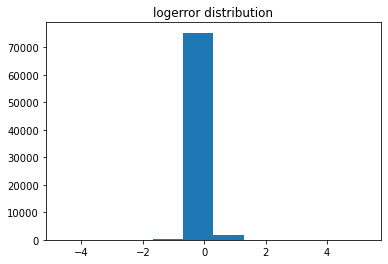

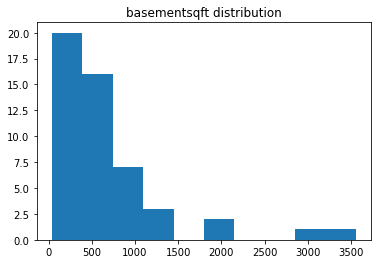

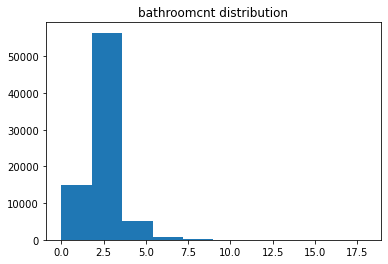

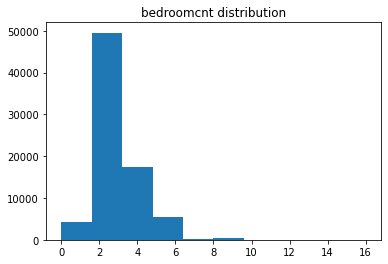

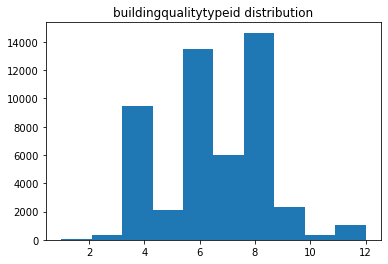

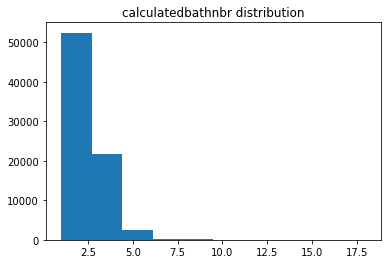

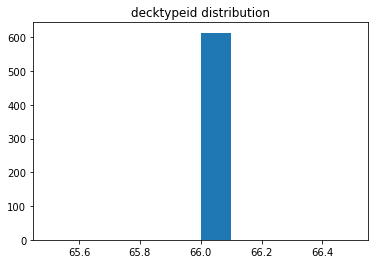

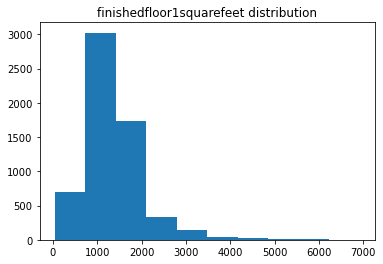

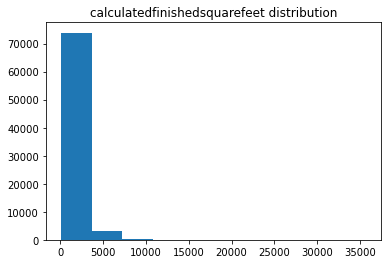

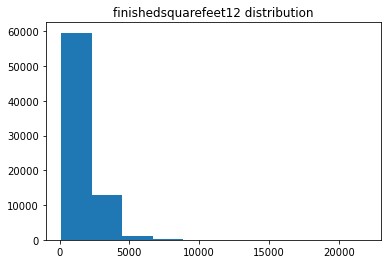

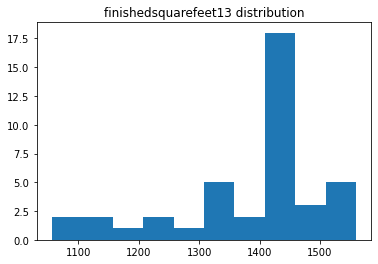

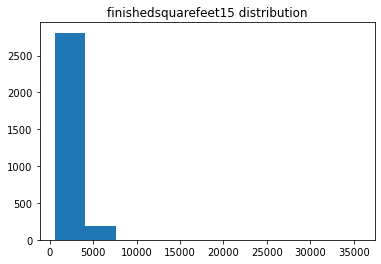

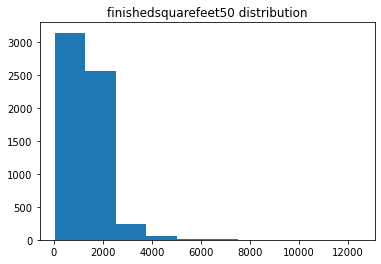

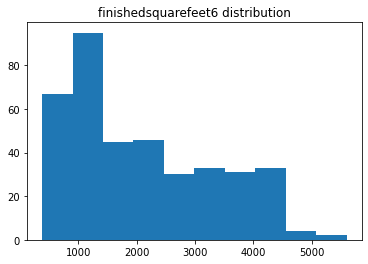

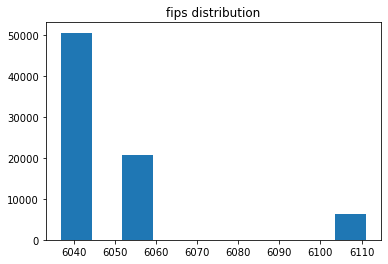

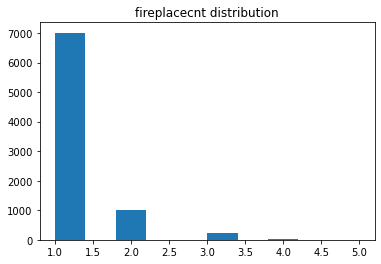

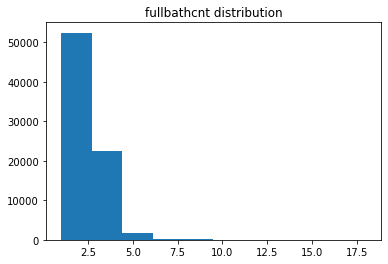

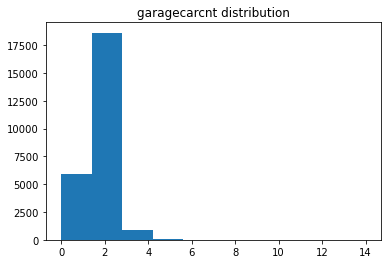

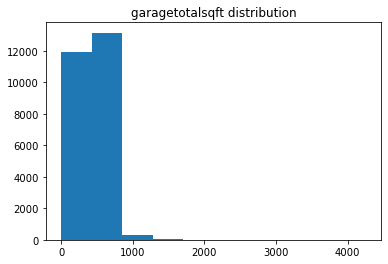

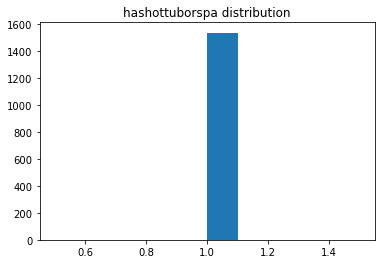

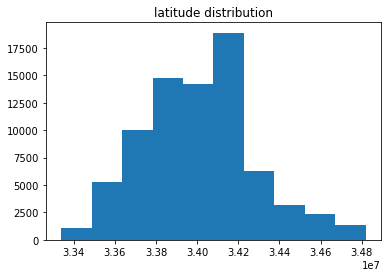

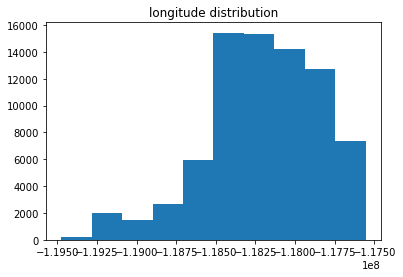

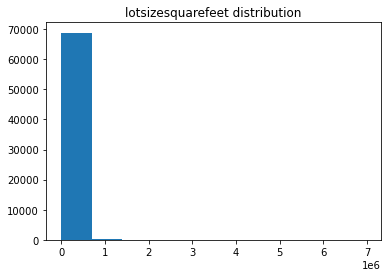

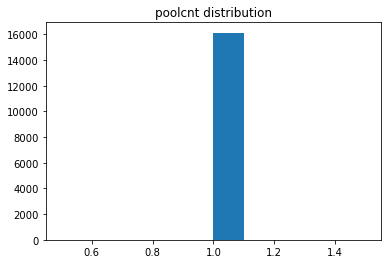

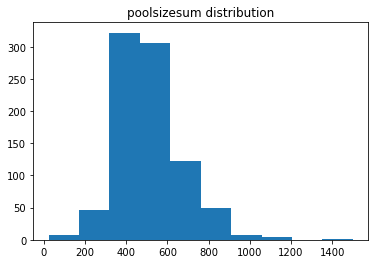

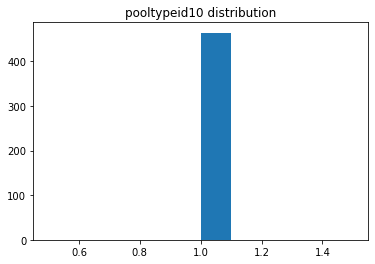

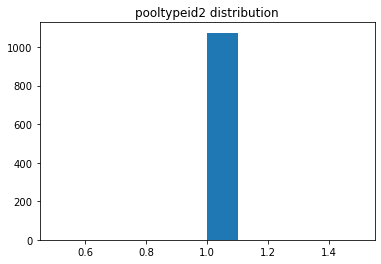

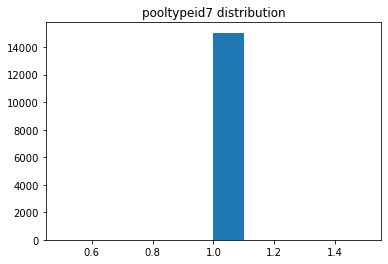

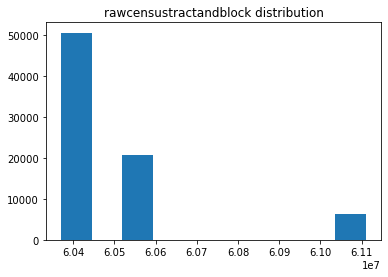

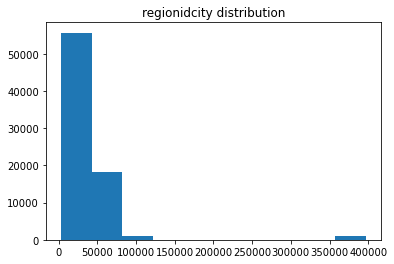

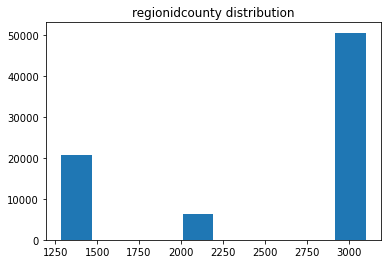

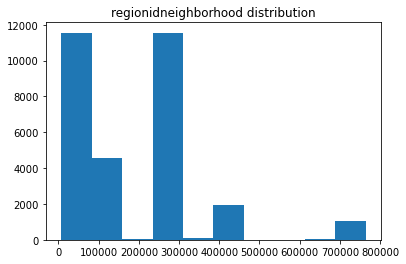

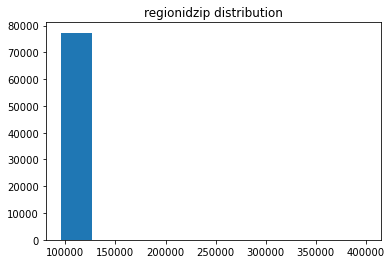

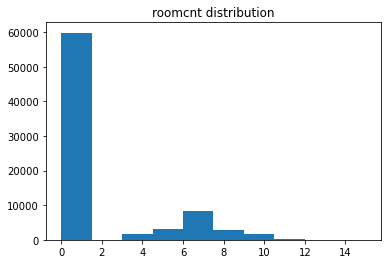

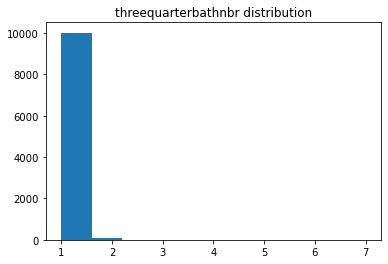

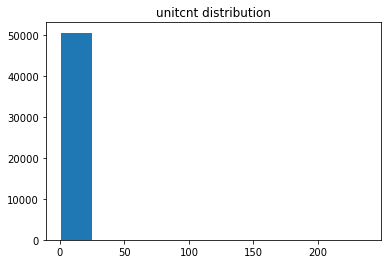

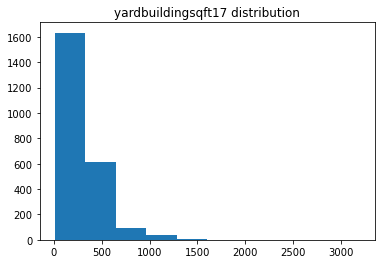

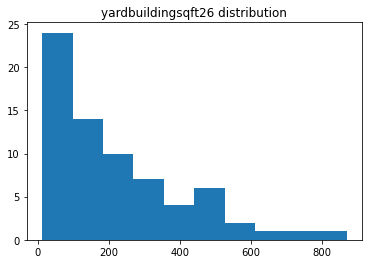

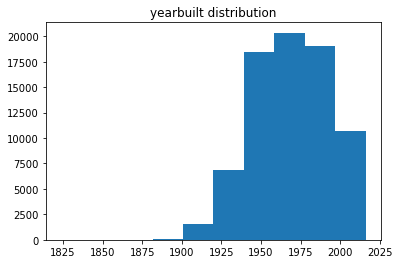

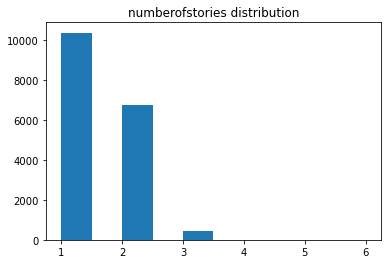

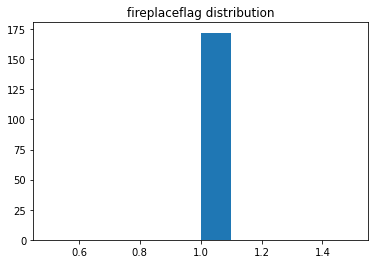

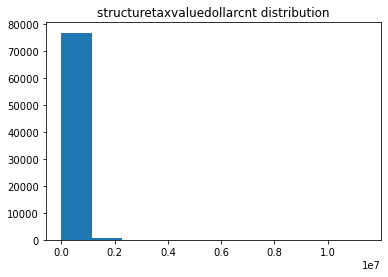

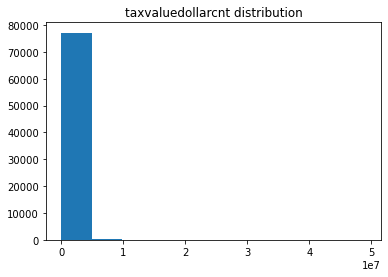

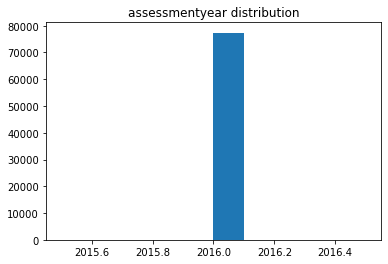

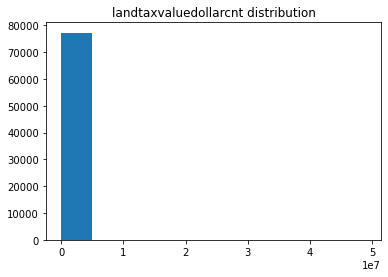

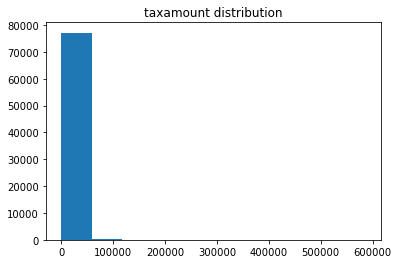

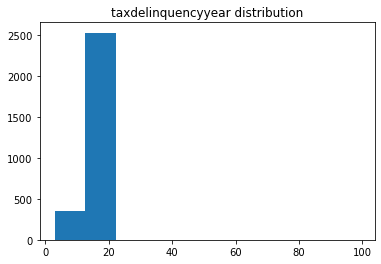

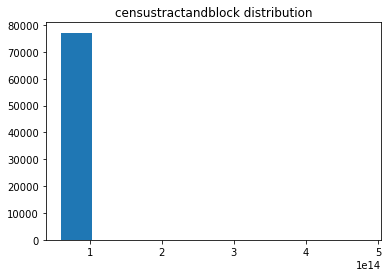

In [12]:
# distribution of the data
con_cols = [col for col in df.columns if (df[col].dtype == 'int64') | (df[col].dtype == 'float64')]

for col in con_cols:
    plt.hist(df[col])
    plt.title(f"{col} distribution")
    plt.show()

In [13]:
# get value counts for discrete variables

desc_cols = [col for col in df.columns if (df[col].dtype == "object")]


for col in desc_cols:
    
    print(col)
    print(df[col].value_counts())
    print()

transactiondate
2017-06-30    1189
2017-04-28     911
2017-05-31     867
2017-07-28     814
2017-08-31     781
              ... 
2017-07-22       1
2017-08-05       1
2017-08-06       1
2017-08-12       1
2018-05-25       1
Name: transactiondate, Length: 265, dtype: int64

propertycountylandusecode
0100    26714
122     13045
010C     8813
0101     6399
34       4922
1111     3353
1        2393
010E     2047
010D     1943
0200     1835
1129     1378
1110     1024
0400      620
0300      481
012C      384
0104      367
1128      333
01DC      211
01HC      137
38         94
010G       93
96         91
0103       91
010H       64
0108       57
1117       55
010M       52
0700       50
1210       42
010V       39
135        38
010F       29
0201       23
0109       18
1222       16
01HE       11
1116       10
73          9
1310        8
1112        8
1720        7
0110        6
0113        6
1410        5
070D        5
012E        5
0401        4
0141        4
0105        3
1120        3

## Q3) 
Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values

In [14]:
def null_df():
    # number of null values in df
    null = df.isnull().sum()
    # percent null by feature
    percent_null = df.isnull().sum()/df.shape[0]
    return pd.DataFrame({'null_rows': null, 'pct_null': percent_null}) # create/return dataframe


In [15]:
null_df()


,null_rows,pct_null
typeconstructiontypeid,77159,0.997131
storytypeid,77331,0.999354
propertylandusetypeid,0,0.000000
heatingorsystemtypeid,27941,0.361083
buildingclasstypeid,77366,0.999806
architecturalstyletypeid,77175,0.997338
airconditioningtypeid,52428,0.677531
parcelid,0,0.000000
id,0,0.000000
logerror,0,0.000000


# Prepare

## Q1) 
Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. 


In [16]:
df.propertylandusedesc.value_counts()


Single Family Residential                     52320
Condominium                                   19294
Duplex (2 Units, Any Combination)              2009
Planned Unit Development                       1944
Quadruplex (4 Units, Any Combination)           727
Triplex (3 Units, Any Combination)              535
Cluster Home                                    333
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       58
Residential General                              37
Cooperative                                      29
Commercial/Office/Residential Mixed Used         15
Townhouse                                         6
Name: propertylandusedesc, dtype: int64

In [17]:
df.propertylandusedesc.value_counts().describe()


count       13.000000
mean      5952.384615
std      14882.292423
min          6.000000
25%         37.000000
50%        333.000000
75%       1944.000000
max      52320.000000
Name: propertylandusedesc, dtype: float64

In [18]:
#piggybacking off the framing in the question, any shared construction will be removed, only top 3 quartiles (37 or more) will be considered
df_unit = df[(df.propertylandusedesc == 'Single Family Residential') |
          (df.propertylandusedesc == 'Mobile Home') |
          (df.propertylandusedesc == 'Manufactured, Modular, Prefabricated Homes') ]

In [19]:
df_unit.shape

(52452, 68)

In [20]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[f'{col}'].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[f'{col}'] > lower_bound) & (df[f'{col}'] < upper_bound)]
        
    return df

In [21]:
df_outremoved = remove_outliers(df_unit, 1.5, ['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt'])


In [22]:
df_outremoved.shape

(48324, 68)

## Q2) 
Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

- The input:
    - A dataframe
    - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
- The output:
    - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
- hint:
    - Look up the dropna documentation.
    - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.


In [23]:
# how much of our df contains more than 30% nulls
(((df_outremoved.isnull().sum()/df_outremoved.shape[0])>.30).sum())/df_outremoved.shape[1]

0.5735294117647058

In [24]:
# how much of our df contains more than 60% nulls
(((df_outremoved.isnull().sum()/df_outremoved.shape[0])>.60).sum())/df_outremoved.shape[1]

0.5

In [25]:
# how much of our df contains more than 95% nulls
(((df_outremoved.isnull().sum()/df_outremoved.shape[0])>.98).sum())/df_outremoved.shape[1]

0.2647058823529412

In [26]:
((df_outremoved.isnull().sum()/df_outremoved.shape[0])>.5).describe()


count       68
unique       2
top       True
freq        34
dtype: object

Takeaway: Half of the df columns contain more than 50% null values, 25% more then 98%. The obvious decision is to drop the top quartile but what about the 3rd quartile?

In [27]:
def handle_missing_values(df, col_perc, row_perc):
    ''' 
        take in a dataframe and percent null paramerters, returns df eliminating nulls by inputed threshold
    '''
    col_thresh = int(round(col_perc*df.shape[0],0)) # calc column threshold
    
    df.dropna(axis=1, thresh=col_thresh, inplace=True) # drop columns with non-nulls less than threshold
    
    row_thresh = int(round(row_perc*df.shape[1],0))  # calc row threshhold
    
    df.dropna(axis=0, thresh=row_thresh, inplace=True) # drop columns with non-nulls less than threshold
    
    return df

In [28]:
df_dropna = handle_missing_values(df_outremoved, .5, .5)


In [29]:
df_dropna.shape

(48324, 34)

handle the remaining missing values:

- Fill with constant value.
- Impute with mean, median, mode.
- Drop row/column

In [30]:
# See how much of 
(df_dropna.isnull().sum()[df_dropna.isnull().sum()>0])/df_dropna.shape[0]

heatingorsystemtypeid         0.347012
buildingqualitytypeid         0.348688
calculatedbathnbr             0.000290
finishedsquarefeet12          0.003187
fullbathcnt                   0.000290
lotsizesquarefeet             0.005215
propertyzoningdesc            0.348916
regionidcity                  0.018645
regionidzip                   0.000372
unitcnt                       0.348522
yearbuilt                     0.000497
structuretaxvaluedollarcnt    0.001262
taxvaluedollarcnt             0.000021
landtaxvaluedollarcnt         0.000021
taxamount                     0.000083
censustractandblock           0.001697
heatingorsystemdesc           0.347012
dtype: float64

In [31]:
review = ['heatingorsystemtypeid', 'buildingqualitytypeid', 'propertyzoningdesc', 'unitcnt', 'heatingorsystemdesc']

for col in review:
    print(col)
    print(df_dropna[col].describe())


heatingorsystemtypeid
count    31555.000000
mean         4.023419
std          2.558857
min          1.000000
25%          2.000000
50%          2.000000
75%          7.000000
max         24.000000
Name: heatingorsystemtypeid, dtype: float64
buildingqualitytypeid
count    31474.000000
mean         6.145898
std          1.591809
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: buildingqualitytypeid, dtype: float64
propertyzoningdesc
count     31463
unique     1229
top        LAR1
freq       6109
Name: propertyzoningdesc, dtype: object
unitcnt
count    31482.000000
mean         1.000635
std          0.026428
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: unitcnt, dtype: float64
heatingorsystemdesc
count       31555
unique          9
top       Central
freq        18894
Name: heatingorsystemdesc, dtype: object


Takeaways: reviewing data, looks too many to try and impute in most columns. Unitcnt worth investigating as it looks as though 2s may be small outliers.



In [32]:
# reviewing data, looks too many to try and impute in most column
df_dropna.unitcnt.value_counts()

1.0    31463
2.0       18
3.0        1
Name: unitcnt, dtype: int64

In [33]:
# small number of 2s and 3s so changing to mode of 1
df_dropna['unitcnt'] = df_dropna['unitcnt'].replace({3:1, 2:1})

In [34]:
# check operation
df_dropna.unitcnt.describe()


count    31482.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: unitcnt, dtype: float64

In [35]:
# drop all columns, even though able to change qty in unitcnt its not providing any value w/identical data
df_dropna = df_dropna.drop(columns=['heatingorsystemtypeid', 'buildingqualitytypeid', 'propertyzoningdesc', 'unitcnt', 'heatingorsystemdesc'])

In [36]:
#check shape
df_dropna.shape


(48324, 29)

In [37]:
# look at remaining nulls as % 
(df_dropna.isnull().sum()[df.isnull().sum()>0])/df_dropna.shape[0] # look at remaining nulls

calculatedbathnbr               0.000290
calculatedfinishedsquarefeet    0.000000
finishedsquarefeet12            0.003187
fullbathcnt                     0.000290
lotsizesquarefeet               0.005215
regionidcity                    0.018645
regionidzip                     0.000372
yearbuilt                       0.000497
structuretaxvaluedollarcnt      0.001262
taxvaluedollarcnt               0.000021
landtaxvaluedollarcnt           0.000021
taxamount                       0.000083
censustractandblock             0.001697
dtype: float64

In [38]:
discrete_col = ['calculatedbathnbr', 'fullbathcnt', 'regionidcity', 'regionidzip', 'yearbuilt', 'censustractandblock']
cont_col = ['calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'lotsizesquarefeet', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']

In [39]:
# percentage nulls small enough that imputing mean shouldn't be an issue, split data first
import acquire
from sklearn.model_selection import train_test_split
X_train, X_validate, X_test = acquire.split_continuous(df_dropna)

train -> (27061, 29)
validate -> (11598, 29)
test -> (9665, 29)


In [40]:
#control check
X_train.shape, X_validate.shape, X_test.shape

((27061, 29), (11598, 29), (9665, 29))

In [41]:
# impute mean on split data


In [42]:
from sklearn.impute import SimpleImputer
def impute(df, my_strategy, column_list):
    ''' take in a df, strategy, and cloumn list
        return df with listed columns imputed using input stratagy
    '''
        
    imputer = SimpleImputer(strategy=my_strategy)  # build imputer

    df[column_list] = imputer.fit_transform(df[column_list]) # fit/transform selected columns

    return df

In [43]:
# split data (discrete)
impute(X_train, 'most_frequent', discrete_col).head()

,propertylandusetypeid,parcelid,id,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc
43719,261.0,12905668,43738,0.037384,2017-06-06,1.0,3.0,1.0,1040.0,1040.0,...,96513.0,0.0,1960.0,88462.0,212786.0,2016.0,124324.0,2764.04,6.037401e+13,Single Family Residential
11180,261.0,13845841,11189,-0.212690,2017-02-21,1.0,2.0,1.0,940.0,NaN,...,97007.0,5.0,1923.0,83687.0,341726.0,2016.0,258039.0,4290.44,6.059075e+13,Single Family Residential
40449,261.0,12572315,40466,0.019696,2017-05-26,1.0,2.0,1.0,920.0,920.0,...,96244.0,0.0,1949.0,72058.0,252211.0,2016.0,180153.0,3174.08,6.037572e+13,Single Family Residential
1438,261.0,14141443,1440,-0.014025,2017-01-08,2.0,4.0,2.0,2161.0,2161.0,...,97041.0,8.0,1963.0,137636.0,727872.0,2016.0,590236.0,8231.08,6.059002e+13,Single Family Residential
27381,261.0,11071734,27395,0.101635,2017-04-18,2.0,4.0,2.0,1823.0,1823.0,...,96346.0,0.0,1962.0,181218.0,516730.0,2016.0,335512.0,6430.03,6.037113e+13,Single Family Residential


In [44]:
# split data (continuous)
impute(X_train, 'mean', cont_col).head()

,propertylandusetypeid,parcelid,id,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc
43719,261.0,12905668,43738,0.037384,2017-06-06,1.0,3.0,1.0,1040.0,1040.000000,...,96513.0,0.0,1960.0,88462.0,212786.0,2016.0,124324.0,2764.04,6.037401e+13,Single Family Residential
11180,261.0,13845841,11189,-0.212690,2017-02-21,1.0,2.0,1.0,940.0,1759.171386,...,97007.0,5.0,1923.0,83687.0,341726.0,2016.0,258039.0,4290.44,6.059075e+13,Single Family Residential
40449,261.0,12572315,40466,0.019696,2017-05-26,1.0,2.0,1.0,920.0,920.000000,...,96244.0,0.0,1949.0,72058.0,252211.0,2016.0,180153.0,3174.08,6.037572e+13,Single Family Residential
1438,261.0,14141443,1440,-0.014025,2017-01-08,2.0,4.0,2.0,2161.0,2161.000000,...,97041.0,8.0,1963.0,137636.0,727872.0,2016.0,590236.0,8231.08,6.059002e+13,Single Family Residential
27381,261.0,11071734,27395,0.101635,2017-04-18,2.0,4.0,2.0,1823.0,1823.000000,...,96346.0,0.0,1962.0,181218.0,516730.0,2016.0,335512.0,6430.03,6.037113e+13,Single Family Residential


In [45]:
# control check
X_train.isnull().sum()

propertylandusetypeid           0
parcelid                        0
id                              0
logerror                        0
transactiondate                 0
bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
propertylandusedesc             0
dtype: int64

### repeat for X_validate & X_test

impute(X_validate, 'most_frequent', discrete_col) impute(X_test, 'most_frequent', discrete_col) impute(X_validate, 'mean', cont_col) impute(X_test, 'mean', cont_col)

In [46]:
#control check 1
X_train.shape, X_validate.shape, X_test.shape

((27061, 29), (11598, 29), (9665, 29))

# Q3
Encapsulate your work inside of functions in a wrangle_zillow.py module.
 - created wrangle_zillow.py function.

# Mall Data
## Q1) Acquire data from mall_customers.customers in mysql database.



In [47]:
# Acquire data
df = wrangle_mall.get_mall_data()

In [48]:
df.head()


,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Q2) 
Summarize data (include distributions and descriptive statistics).

In [49]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [50]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [51]:
df.dtypes

customer_id        int64
gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

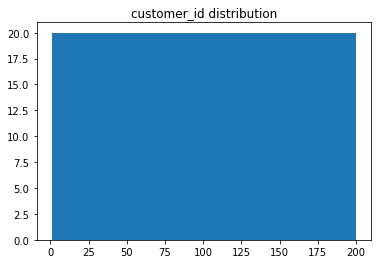

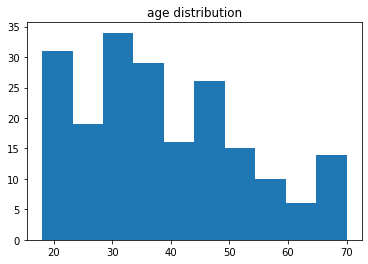

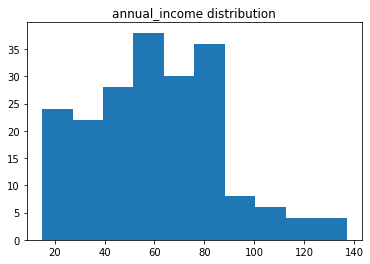

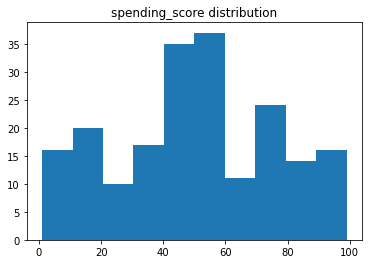

In [52]:
# distribution of the data
cont_cols = [col for col in df.columns if (df[col].dtype == 'int64') | (df[col].dtype == 'float64')]

for col in cont_cols:
    plt.hist(df[col])
    plt.title(f"{col} distribution")
    plt.show()

In [53]:
# get value counts for discrete variables

desc_cols = [col for col in df.columns if (df[col].dtype == "object")]

for col in desc_cols:
    
    print(col)
    print(df[col].value_counts())
    print()

gender
Female    112
Male       88
Name: gender, dtype: int64



## Q3)
Detect outliers using IQR.

In [54]:
def detect_outliers(df, k, col_list):
    ''' get upper and lower bound for list of columns in a dataframe 
        if desired return that dataframe with the outliers removed
    '''
    
    odf = pd.DataFrame()
    
    for col in col_list:

        q1, q2, q3 = df[f'{col}'].quantile([.25, .5, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound
        
        # print each col and upper and lower bound for each column
        print(f"{col}: Median = {q2} lower_bound = {lower_bound} upper_bound = {upper_bound}")

        # return dataframe of outliers
        odf = odf.append(df[(df[f'{col}'] < lower_bound) | (df[f'{col}'] > upper_bound)])
            
    return odf

In [55]:
odf = detect_outliers(df, 1.5, ['age', 'annual_income', 'spending_score'])

age: Median = 36.0 lower_bound = -1.625 upper_bound = 79.375
annual_income: Median = 61.5 lower_bound = -13.25 upper_bound = 132.75
spending_score: Median = 50.0 lower_bound = -22.625 upper_bound = 130.375


In [56]:
odf

,customer_id,gender,age,annual_income,spending_score
198,199,Male,32,137,18
199,200,Male,30,137,83


## Q4)
Split data into train, validate, and test.

In [57]:
def train_validate_test_split(df):
    '''split df into train, validate, test'''
    
    train, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train, test_size=.3, random_state=123)
    
    return train, validate, test

In [58]:
train, validate, test = train_validate_test_split(df)


## Q5) 
Encode categorical columns using a one hot encoder (pd.get_dummies).

## Q6)
Handles missing values.

## Q7)
Scaling

In [59]:
import sklearn.preprocessing
def min_max_scaling(train, validate, test, num_cols):
    '''
    Add scaled versions of a list of columns to train, validate, and test
    '''
    
    # reset index for merge 
    train = train.reset_index(drop=True)
    validate = validate.reset_index(drop=True)
    test = test.reset_index(drop=True)
    
    scaler = sklearn.preprocessing.MinMaxScaler() # create scaler object

    scaler.fit(train[num_cols]) # fit the object 

    # transform to get scaled columns
    train_scaled = pd.DataFrame(scaler.transform(train[num_cols]), columns = train[num_cols].columns + "_scaled")
    validate_scaled = pd.DataFrame(scaler.transform(validate[num_cols]), columns = validate[num_cols].columns + "_scaled")
    test_scaled = pd.DataFrame(scaler.transform(test[num_cols]), columns = test[num_cols].columns + "_scaled")
    
    # add scaled columns to dataframes
    train = train.merge(train_scaled, left_index=True, right_index=True)
    validate = validate.merge(validate_scaled, left_index=True, right_index=True)
    test = test.merge(train_scaled, left_index=True, right_index=True)
    
    return train, validate, test

In [60]:
train, validate, test = min_max_scaling(train, validate, test, ['age', 'annual_income', 'spending_score'])


In [61]:
print(train.shape, validate.shape, test.shape)


(112, 8) (48, 8) (40, 8)


In [62]:
# Checking some operations from the Modeling Exercises


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

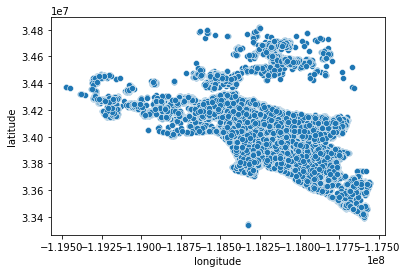

In [63]:
sns.scatterplot(data=df_dropna, x='longitude', y='latitude')


In [64]:
loc_df = df_dropna[['longitude', 'latitude']]


<AxesSubplot:xlabel='longitude', ylabel='Count'>

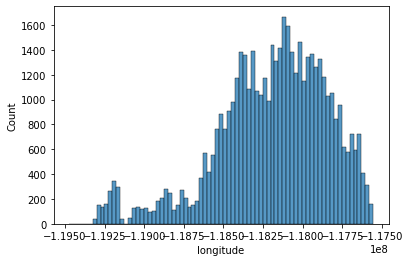

In [65]:
sns.histplot(data=loc_df, x='longitude')


<AxesSubplot:xlabel='latitude', ylabel='Count'>

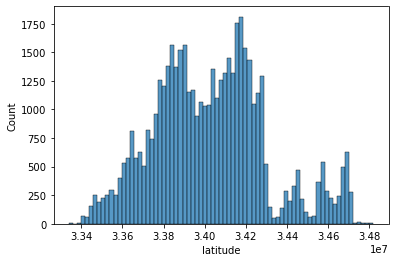

In [66]:
sns.histplot(data=loc_df, x='latitude')


In [67]:
from sklearn.cluster import KMeans


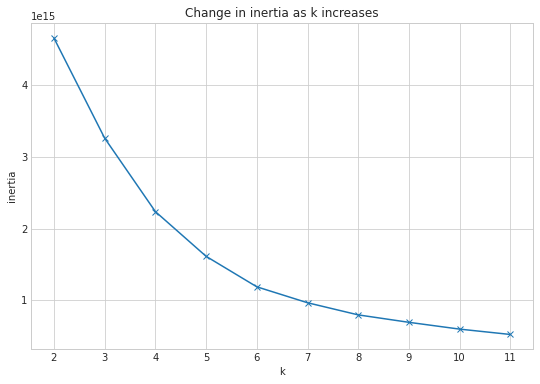

In [68]:

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(loc_df).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [69]:
# establish instance of k, fit and use to predict
kmeans = KMeans(n_clusters=4)
kmeans.fit(loc_df)

kmeans.predict(loc_df)

array([1, 0, 1, ..., 2, 1, 1], dtype=int32)

In [70]:
# append predictions to our original dataframe
loc_df['cluster'] = kmeans.predict(loc_df)

In [71]:
loc_df.head()


,longitude,latitude,cluster
0,-117869207.0,33634931.0,1
1,-119281531.0,34449266.0,0
2,-117823170.0,33886168.0,1
3,-118240722.0,34245180.0,2
6,-118179824.0,34145202.0,2


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

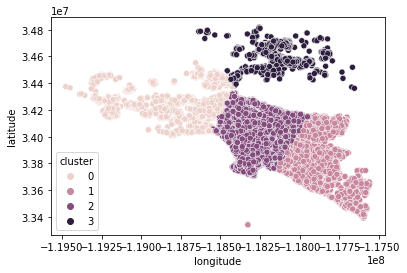

In [72]:
# Plot original vs kmeans cluster prediction

sns.scatterplot(data=loc_df, x='longitude', y='latitude', hue='cluster')

Encapsulate your work in a wrangle_mall.py python module.